In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [179]:
#Lectura del CSV bike_train

df = pd.read_excel('bike_train.xlsx')

In [180]:
px.bar(df.corr().loc["cnt"].sort_values(), title="Correlaciones de variables con CNT")

A partir del gráfico anterior, entrenaré un Árbol de Decisión con las 6 variables que presentan mayor correlación con el target CNT. Tal como se aclara en el notebook de análisis exploratorio, no utilizaré las features registered, casual por no encontrarse en el dataset bike_test. Por otra parte, tampoco utilizaré atemp por ser casi igual a temp, ni instant que es un índice.

Defino las variables independientes X, y la variable target y

In [181]:
X=df[["hum", "hr", "temp", "season", "weathersit", "yr"]]
y=df.cnt

Separo los datos en conjuntos de train y test para poder calcular mas adelante el RMSE

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [183]:
tree = DecisionTreeRegressor()

Utilizo GridSearch para identificar el mejor hiperparámetro de profundidad en el árbol de decisión

In [184]:
profundidad = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25]}
gs = GridSearchCV(tree, profundidad)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 25]})

In [185]:
gs.best_params_

{'max_depth': 9}

Entreno el modelo con el hiperparámetro seleccionado

In [186]:
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

Calculo el error con la métrica RMSE

In [187]:
y_test_pred = tree.predict(X_test)
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred, squared=False))

Error en datos de test: 77.02356120832228


Muestro gráficamente el desempeño del modelo, si bien hay diferencias entre los valores reales y los previstos por el modelo, se evidencia que los valores se agrupan en torno a la diagonal que cruza el gráfico desde el extremo inferior izquierdo hasta el extremo superior derecho, lo que refleja un correcto desempeño del modelo. Idealmente, cada punto debería ubicarse en dicha diagonal, y esto significaría que el modelo funciona a la perfección.

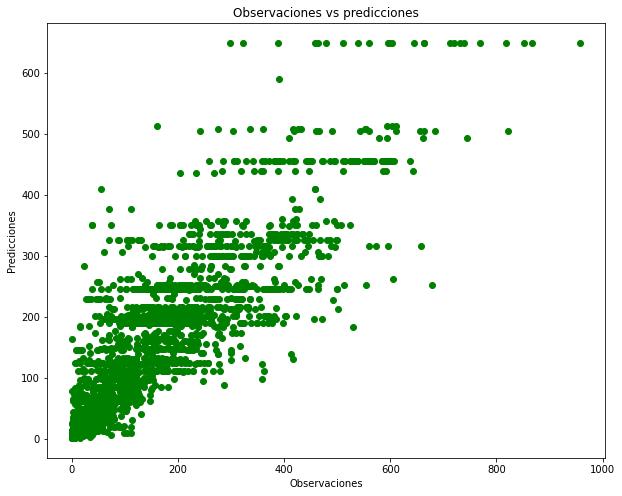

In [188]:
plt.figure(figsize = (10,8))
plt.axes()
plt.scatter(y_test, y_test_pred,  color='green')
plt.gca().update(dict(title='Observaciones vs predicciones', xlabel='Observaciones', ylabel='Predicciones'))

plt.show()

A continuación voy a predecir la variable cnt en el dataset bike_test, que es el objetivo de este modelo. Lo anterior era sólo para evaluar el desempeño del mismo y elegir los mejores hiperparámetros.

In [189]:
df2=pd.read_excel("bike_test.xlsx")

In [190]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700


Utilizo el modelo previamente entrenado para predecir el target 'y' a partir de las features 'X' obtenidas del dataset bike_test

In [191]:
X_test2=df2[["hum", "hr", "temp", "season", "weathersit", "yr"]]
y_test_pred2 = tree.predict(X_test2)

Exporto los resultados como CSV

In [192]:
predicciones=pd.DataFrame(y_test_pred2)
predicciones=predicciones.rename(columns={0:"pred"})
predicciones.to_csv('dfrankram.csv', index=False)